# Popular  Feature Selection Techniques Used in Machine Learning

Reference Link 1: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/#:~:text=The%20Chi%2Dsquare%20test%20is,the%20best%20Chi%2Dsquare%20scores.

Reference Link 2 : https://dataaspirant.com/feature-selection-methods-machine-learning/

Referenec Link 3 : https://www.datacamp.com/community/tutorials/feature-selection-python

# General Thought

None of the feature selection methods can be regarded as the best method.  Even speaking on a universal scale, there is no best machine learning algorithm or the best set of input variables. 
Instead, we need to discover which feature selection will work best for our specific problem using careful, systematic experimentation. 
So, we try a range of models on different subsets of features chosen using various statistical measures and then discover what works best for our concerned problem.

The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset.
Feature selection and Data cleaning should be the first and most important step of your model designing.

Reasons for Using Feature Selection Techniques.

1) It is almost rare that all the variables in the dataset are useful to build a model.\
2) Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a    classifier.\
3) Adding more and more variables to a model increases the overall complexity of the model.


Generally , There are many methods for feature selection.So, Feature Selection Techniques can be broadly categorised into 4 categories.\
1) Filter Methods.\
2) Wrapper Methods. \
3) Embedded methods. \
4) Hybrid methods. 

# Filter Methods : Popular Methods under Filter Methods

Some Properties of Filter Methods.

1) It uses "the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance".\
2) These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

Some Popular Methods Under Feature Selection.

a) Correlation Coefficient.\
b) Fisher’s Score. \
c) Chi-square Test. \
d) Information Gain. \
e) Variance Threshold.\
f) Mean Absolute Difference (MAD). \
g) Dispersion ratio. 


# Let's Learn Correlation Coefficient. 

1) Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. \
2) The logic behind using correlation for feature selection is that the good variables are highly correlated with the target.\
3) Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.\
4) If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information.\
5) We need to set an absolute value, say 0.5 as the threshold for selecting the variables.\
6) If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable. \
7) We can also compute multiple correlation coefficients to check whether more than two variables are correlated to each other. This phenomenon is known as multicollinearity.\
8) It is also an important pre-processing step in Machine Learning pipelines to compute and analyze the correlation matrix where dimensionality reduction is desired on a high-dimension data.\
9) Each cell of the correlation matrix is called Correlation Coefficient.

Reference Link : https://likegeeks.com/python-correlation-matrix/

In [57]:
from sklearn.datasets import load_breast_cancer

import pandas as pd

breast_cancer = load_breast_cancer()

data = breast_cancer.data

features = breast_cancer.feature_names

df = pd.DataFrame(data, columns = features)

print(df.shape)

print(features)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


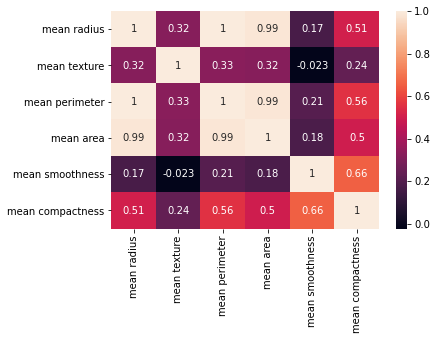

In [58]:
import seaborn as sns

import matplotlib.pyplot as plt

# taking all rows but only 6 columns
df_small = df.iloc[:,:6]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

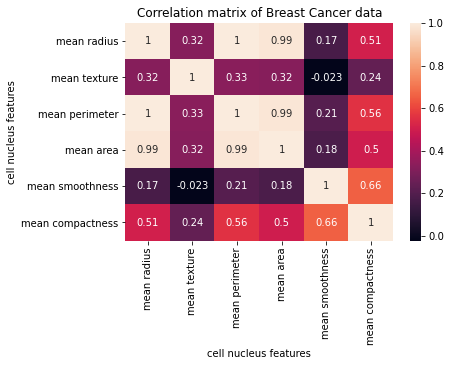

In [59]:
correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.title("Correlation matrix of Breast Cancer data")

plt.xlabel("cell nucleus features")

plt.ylabel("cell nucleus features")

plt.show()

A value near to 0 (both positive or negative) indicates the absence of any correlation between the two variables, and hence those variables are independent of each other.

# Sorting the correlation matrix

If the given data has a large number of features, the correlation matrix can become very big and hence difficult to interpret.

Sometimes we might want to sort the values in the matrix and see the strength of correlation between various feature pairs in an increasing or decreasing order.

First, we will convert the given matrix into a one-dimensional Series of values.

In [ ]:
correlation_mat = df_small.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

The unstack method on the Pandas DataFrame returns a Series with MultiIndex.That is, each value in the Series is represented by more than one indices, which in this case are the row and column indices that happen to be the feature names.

In [60]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

NameError: name 'corr_pairs' is not defined

we now have the sorted correlation coefficient values of all pairs of features and can make decisions accordingly

Selecting strong correlation pairs (magnitude greater than 0.5)

In [61]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

NameError: name 'sorted_pairs' is not defined

Converting a covariance matrix into the correlation matrix.
This relation can be found at this link.https://likegeeks.com/python-correlation-matrix/

In [ ]:
use a covariance matrix of the data and generate the correlation matrix from it by dividing it with the product of standard deviations of individual features.

In [ ]:
cov = np.cov(df_small.T)

print(cov)

#compute standard deviations of each of the 6 features
stds = np.std(df_small, axis = 0) #shape = (6,)

stds_matrix = np.array([[stds[i]*stds[j] for j in range(6)] for i in range(6)])

print("standard deviations matrix of shape:",stds_matrix.shape)


# Let's Learn Fisher's Score

1) Fisher score is one of the most widely used supervised feature selection methods.\
2) The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order.

In [28]:
from skfeature.function.similarity_based import fisher_score
from sklearn.datasets import load_diabetes

ModuleNotFoundError: No module named 'skfeature'

# Let's Learn Chi-Square Test

--> Chi-square test is used for categorical features in a dataset.\
--> We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores.\
--> In order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.


In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#convert to categorical data by converting data to integers.

x_cat=x.astype('int')

# three features with highest chi-squared statistics are selected.
chi2_features=SelectKBest(chi2, k=3)
x_kbest_features=chi2_features.fit_transform(x_cat,y)

#reduced_features
print('Original feature number : ', x_cat.shape[1])
print('Reduced feature number : ',x_kbest_features.shape[1])


NameError: name 'x' is not defined

# Performing Feature Selection on Titanic Dataset using Fisher Score and Chi2.

Reference link : https://kgptalkie.com/feature-selection-using-fisher-score-and-chi2-%CF%872-test-titanic-dataset-machine-learning-kgp-talkie/

In [41]:
#Importing important liberaries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
#loading the dataset.
titanic_data=sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
#
titanic_data.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [44]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [45]:
titanic_data.isnull().count()

survived       891
pclass         891
sex            891
age            891
sibsp          891
parch          891
fare           891
embarked       891
class          891
who            891
adult_male     891
deck           891
embark_town    891
alive          891
alone          891
dtype: int64

In [49]:
titanic_data.drop(labels= ['age','deck'], inplace=True)
#titanic_data=titanic_data.dropna()
titanic_data.isnull().sum()

KeyError: "['age' 'deck'] not found in axis"

In [ ]:
data=titanic_data['pclass','sex','sibsp','parch','embarked','who','alone'].copy()
data.head()

In [ ]:
data.isnull.sum()

In [ ]:
data['sex'].value_counts()

In [ ]:
#updating a single column.
#male ==0 and female ==1
sex={'male':0 , 'female' : 1}
data['sex']=data['sex'].map(sex)
data



In [50]:
data['embarked'].value_counts()

# S==0, C==1, Q==2
ports={'S':0, 'C':1,'Q':2}
data['embarked']=data['embarked'].map(ports)



KeyError: 'embarked'

In [ ]:
data['who'].value_counts()
# man==0 , woman ==1, child==2
who={'man':0,'woman':1,'child':2}
data['who']=data['who'].map(who)

In [ ]:
data['whole'].value_counts()
#False ==0  and True ==1
alone={False:0, True:1}
data['alone']=data['alone'].map(alone)

In [51]:
#Working Fisher_score

x=data.copy()
y=titanic_data['survived']
x.shape, y.shape

In [53]:
#Let's train , test , split the dataset with test size equals to 0.2.

In [ ]:
x_train, x_test, y_train, y_test=train_test_splt(x,y,test_size=0.2,random_state=42)

f_score=chi2(x_train, y_train)
print("F-Score :{}".format(f_score))

In [ ]:
p_values=pd.Series(f_score[1],index=x_train.columns)
p_values.sort_values(ascending=True, inplace=True)
p_values

In [ ]:
p_values.plot.bar()
plt.title('Pvalues with respect to features.')

In [ ]:
x_train2=x_train['who','sex']
x_test2=x_test[['who','sex']]


In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time 
run_randomForest(x_train2,y_train2,y_train,y_test)

In [ ]:
x_train3=x_train[['who','sex','pclass']]
x_test3=x_test[['who','sex','pclass']]

In [ ]:
%%time
run_randomForest(x_train3,x_test3,y_train, y_test)

In [ ]:
x_train4=x_train[['who','sex','pclass','embarked']]
x_test4=x_test[['who','sex','pclass','embarked']]


In [ ]:
%%time
run_randomForest(x_train4,x_test4,y_train, y_test)

In [ ]:
x_train5=x_train[['who','sex','pclass','embarked','alone']]
x_test5=x_test[['who','sex','pclass','embarked','alone']]

In [ ]:
%%time
run_randomForest(x_train5,x_test5,y_train, y_test)

In [ ]:
%%time
run_randomForest(x_train,x_test,y_train, y_test)

# Let's Learn Information Gain

--> Information gain calculates the reduction in entropy from the transformation of a dataset.\
--> It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances=mutual_info_classif(x,y)
feat_importances=pd.Series(importances, dataframe.columns(0:len(dataframe.columns)-1))
feat_importances.plot(kind='barh', color="teal")
plt.show()

# Let's Learn Variance Threshold

--> It removes all features which variance doesn’t meet some threshold.\
-->  By default, it removes all zero-variance features, i.e., features that have the same value in all samples.\
--> We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.\
--> The get_support() returns a Boolean vector where True means that the variable does not have zero variance.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

#Resetting the value of x to make it non categorical.
x=array[:,0:8]
v_threshold=VarianceThreshold(threshold=0)
v_threshold.fit(x) # fits finds the features with zero variance.
v_threshold.get_support()




# Let's Learn Mean Absolute Difference (MAD)

The mean absolute difference (MAD) computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scale variant.’ [1] This means that higher the MAD, higher the discriminatory power.

In [ ]:
#calculating MAD.
mean_abs_diff=np.sum(np.abs(x-np.mean(x,axis=0)),axis=0)/x.shape[0]

#plot the barchart.
plt.bar(np.arange(x.shape[1],mean_abs_diff, color='teal'))

# Let's Learn Dispersion Ratio'

‘Another measure of dispersion applies the arithmetic mean (AM) and the geometric mean (GM). For a given (positive) feature Xi on n patterns, the AM and GM are given by
respectively; since AMi ≥ GMi, with equality holding if and only if Xi1 = Xi2 = …. = Xin, then the ratio
can be used as a dispersion measure. Higher dispersion implies a higher value of Ri, thus a more relevant feature. Conversely, when all the feature samples have (roughly) the same value, Ri is close to 1, indicating a low relevance feature.’ 

In [31]:
x=x+1 # to avoid 0 for denominator.
# arithemetic mean
am=np.mean(x,axis=0)
#geometric mean.
gm=np.power(np.prod(x,axis=0),1/x.shape[0])
#ratio of arithemetic mean and geometric mean.
dispersion_ration=am/gm
#plotting the bar chart.
plt.bar(np.arange(x.shape[1]),dispersion_ration,color='teal')

NameError: name 'x' is not defined

# Wrapper Methods : Popular Methods Under Wrapper Methods

--> Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset.\
--> It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion.\
--> The wrapper methods usually result in better predictive accuracy than filter methods.

Some Popular Methods Under Filter Methods.\
1) Forward Feature Selection \
2) Backward Featuer Elimination \
3) Exhaustive Feature Selection \
4) Recursive Feature Elimination 

# Let's Learn Forward Feature Selection Method.

In [34]:
#forward feature selection selection 
from sklearn.feature_selection import SequentialFeatureSelector
ffs=SequentialFeatureSelector(lr,k_features='best',forward=True,n_jobs=-1)
ffs.fit(x,y)
features=list(ffs.k_features_names_)
features=list(map(int,features))
lr.fit(x_train[features],y_train)
y_pred=lr.predict(x_train[features])


ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)


sfs.get_support()

sfs.transform(X).shape


# Let's Learn Backward Feature Selection.

This Method works exactly opposite of Forward Feature Selection.
We start with all the features available and build a model.Next,the 
variable from the model which gives the best evaluation measure value.
This process is continued until the preset criterion is acheived.

In [36]:
#Backward Feature Selection.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

lr=LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=42,n_jobs=-1, max_iter=500)
lr.fit(x,y)
ffs=SequentialFeatureSelector(lr,k_features='best',forward=True,n_jobs=-1)
ffs.fit(x,y)
features=list(ffs.k_features_names_)
features=list(map(int,features))
lr.fit(x_train[features],y_train)
y_pred=lr.predict(x_train[features]

# Let's learn Exhaustive Feature Selection.

This is the most robust feature selection method covered so far.
This is a brute force evaluation of each feature subset. This means that it tries 
every possible combination of the variables and returns the best performing subset.

In [ ]:
#Exhaustive Feature Selection.
from sklearn.feature_selection import ExhaustiveFeatureSelector

#import the algorithm you want to evaluate on your features.
from sklearn.ensemble import RandomForestClassifier

#create the ExhaustiveFeatureSelector Object.
efs=ExhaustiveFeatureSelector(RandomForestClassifier(),min_features=4, max_features=8,scoring='roc_auc', cv=2)

#fits the object to the training data.
efs=efs.fit(x,y)

#print the selected features
selected_features=x_train.columns[list(efs.best_idx_)]
print(selected_features)
#print the final prediction  score.
print(efs.best_score)


# Let's Learn Recursive Feature Elimination.

‘Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.

Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [ ]:
#recursive feature selection
from sklearn.feature_selection import RFE
rfe=RFE(lr,n_features_to_select=7)
rfe.fit(x_train,y_train)
y_pred=rfe.predict(x_train)

# Embedded Methods : Popular Methods Under Embedded Methods.

These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

Popular Methods.

1) LASSO Regularization (L1) \
2) Random Forest Importance 

# Let's Learn LASSO Regularization(L1).

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [66]:
l=range(1,10)